In [ ]:
pip install ydata-profiling

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
label_encoder = LabelEncoder()
df['Gender_Numeric'] = label_encoder.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Numeric
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [ ]:
df.drop('Gender', axis=1, inplace=True)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Numeric
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


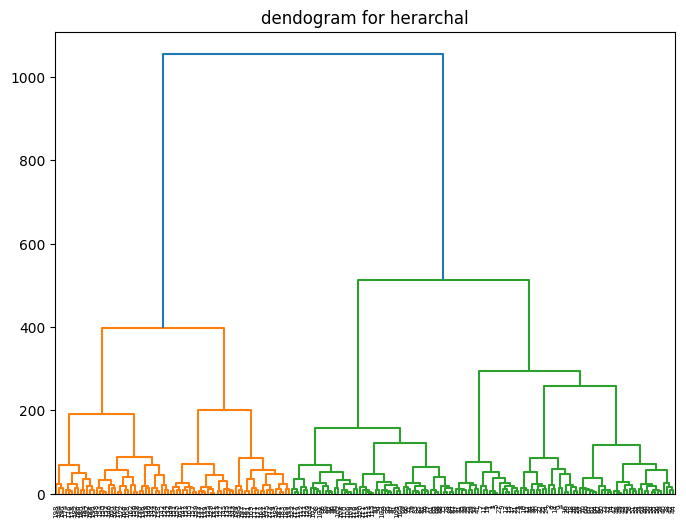

In [ ]:
linkage_data=linkage(df,method='ward',metric='euclidean')
plt.figure(figsize=(8,6))
dendrogram(linkage_data)
plt.title('dendogram for herarchal')
plt.show()

line_d=3
clusters_herarch=fcluster(linkage_data,line_d,criterion='maxclust')

In [ ]:
clusters_herarch

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Numeric
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


0.33073425793530475
0.3766801400675223


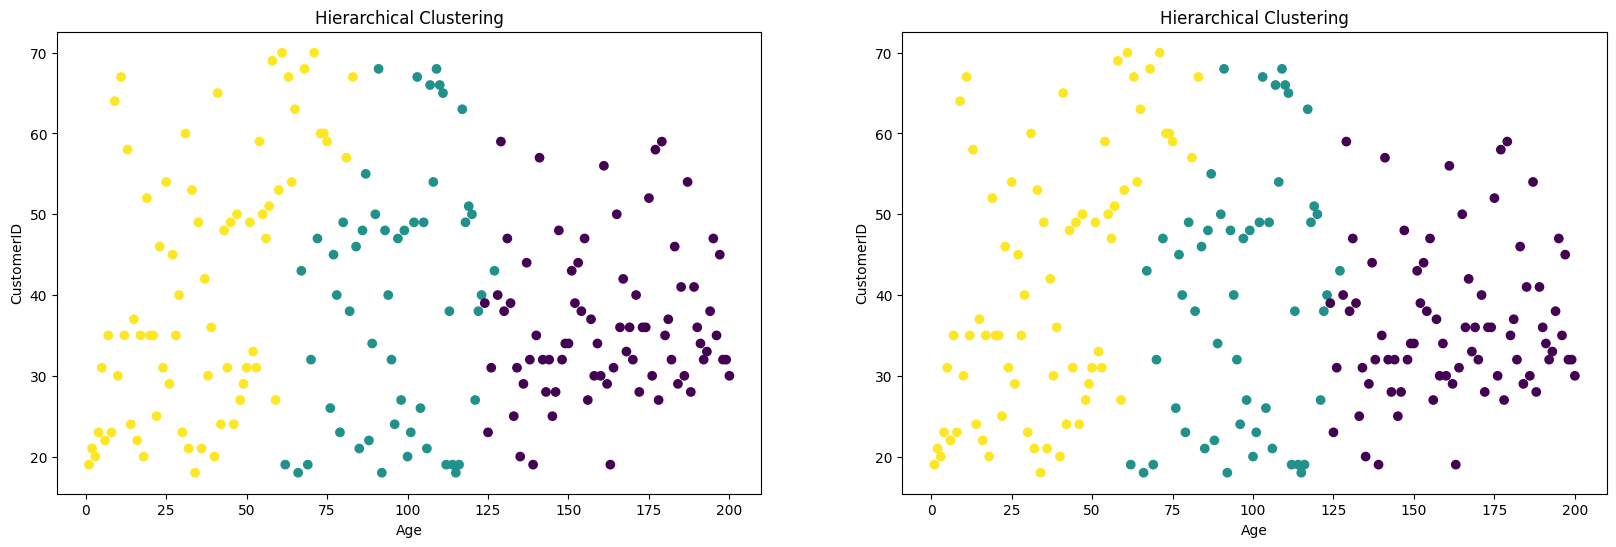

In [ ]:
kmean=KMeans(n_clusters=3,random_state=42)
cluster_kmean=kmean.fit_predict(df)

sil_herarch=silhouette_score(df,clusters_herarch)
sil_kmean=silhouette_score(df,cluster_kmean)
print(sil_herarch)
print(sil_kmean)


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_herarch, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CustomerID')
plt.title('Hierarchical Clustering')

plt.subplot(1, 2, 2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_herarch, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CustomerID')
plt.title('Hierarchical Clustering')

plt.show()